In [1]:
import matplotlib.pyplot as plt
import numpy as np
import spatial_profiles as prf
import models
import boundary_conditions
import plotting

%matplotlib notebook

In [2]:
ion_concentration_molar = 1e-3
x = prf.get_x_axis_nm(100, 1000)
bc = boundary_conditions.Dirichlet(phi_0=0.5)
xmin = -0.05
xmax = 2.5

<IPython.core.display.Javascript object>


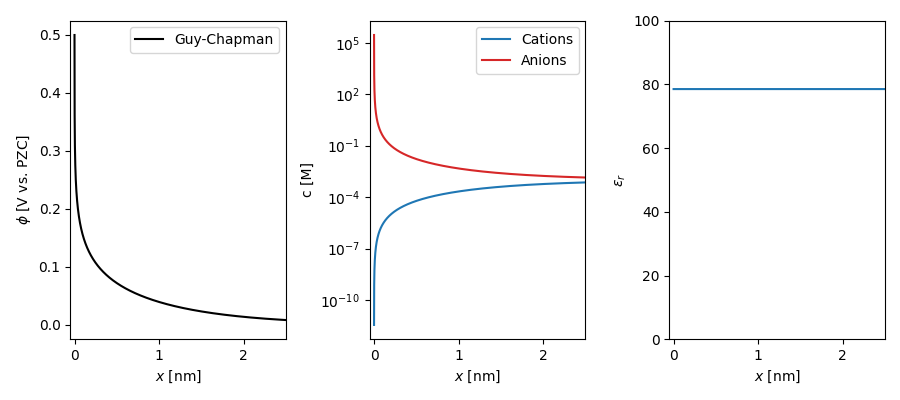

In [3]:
gc = models.GuyChapman(ion_concentration_molar)
gc_sol = gc.solve(x, bc)

fig, ax = plotting.plot_solution(gc_sol, xmin, xmax)
plt.show()

<IPython.core.display.Javascript object>


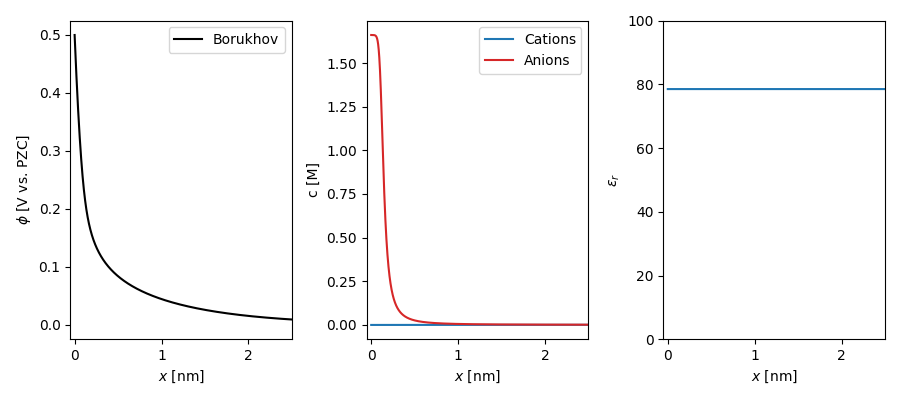

In [4]:
bao = models.BorukhovAndelmanOrland(ion_concentration_molar, 10e-10)
bao_sol = bao.solve(x, bc)

fig, ax = plotting.plot_solution(bao_sol, xmin, xmax, logscale=False)
plt.show()

<IPython.core.display.Javascript object>


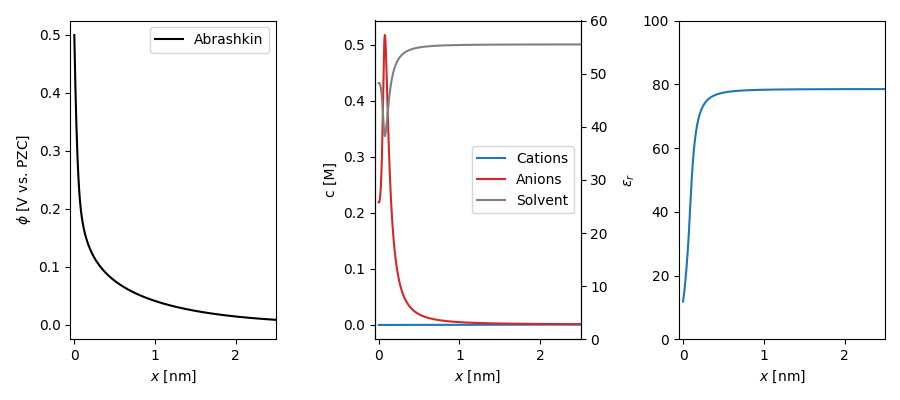

In [5]:
abr = models.AbrashkinAndelmanOrland(ion_concentration_molar, 10e-10)
abr_sol = abr.solve(x, bc)

fig, ax = plotting.plot_solution(abr_sol, xmin, xmax, logscale=False, plot_water=True)
plt.show()